Run the next cell to download all the required packages to run this soruce file

In [1]:
!pip install pandas numpy seaborn matplotlib vadersentiment nltk scikit-learn xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import numpy as np
%matplotlib inline

Now load the train dataset

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


Let us take a look at the data type of each column element

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [5]:
train_df.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


Let us check the relation between effectiveness_rating and base score

In [6]:
train_df.corr()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
patient_id,1.000000,0.018803,0.017499,0.010924
effectiveness_rating,0.018803,1.000000,0.242224,0.412301
number_of_times_prescribed,0.017499,0.242224,1.000000,0.134295
base_score,0.010924,0.412301,0.134295,1.000000


from this we can see that a increase in 1% of effectiveness_rating leads to 0.412301% increase in the base_score

Let us take a look at the graph between each numerical column (note: patient_id is unique for every entry and has almost no corelation with the base_score )

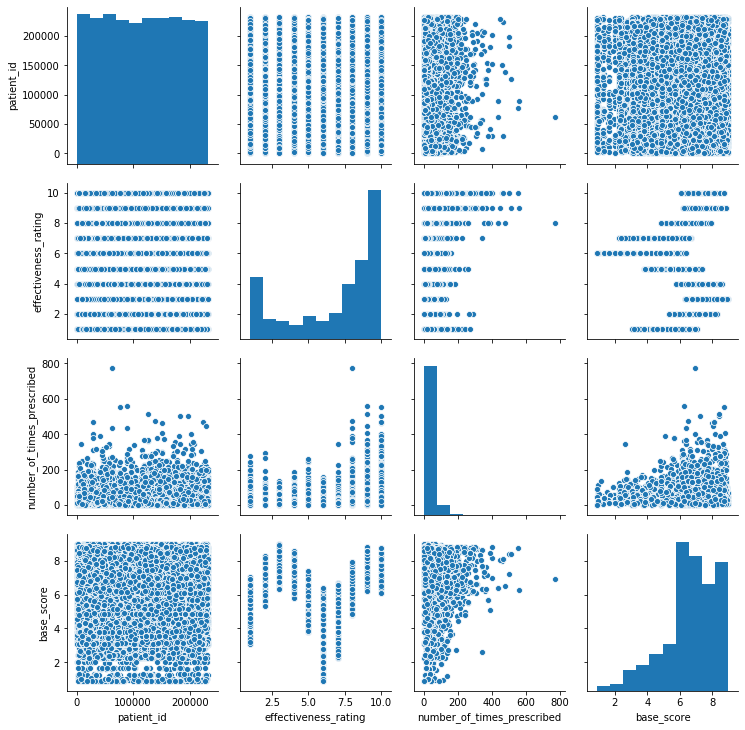

In [7]:
sns.pairplot(data = train_df)

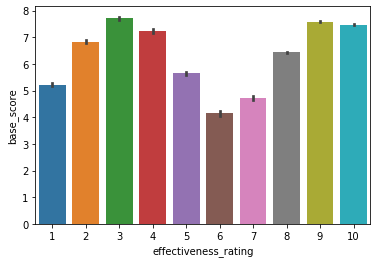

In [8]:
sns.barplot(x='effectiveness_rating' , y='base_score',data=train_df)

from this plot we understand that the base_score is not completely dependent on the effectiveness_rating as there are cases where essictiveness_rating is more but base_score is less, we need to analyse other features as well

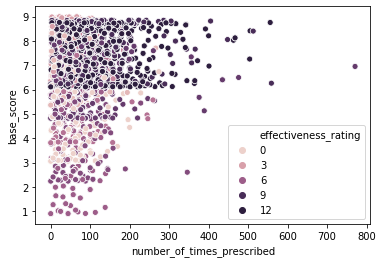

In [9]:
sns.scatterplot(x='number_of_times_prescribed',y='base_score',data = train_df,hue='effectiveness_rating')

From this we get to see that better the effectiveness rating and the number of times the drug is prescribed the better is the base score but we still cannot find a proper pattern to make predictions. We can also analyze the patient review and also add this as a input feature

Review Sentiment Analysis

We can use nlp(natural language processing) to process the patient review and convert them into types like good , bad or neutral

We will use the nltk stopwords to clean the reviews (stopwords are those words which do not have much meaning in the sentence)
we will remove the stopwoeds from the patient review so that if will be easier to analize the sentiment of the sentence

In [10]:
import nltk
nltk.download(['stopwords'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [12]:
train_df['CleanReview'] = train_df['review_by_patient'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
train_df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,CleanReview
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,"""It side effect, I take combination Bystolic 5..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,"""My son halfway fourth week Intuniv. We became..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,"""I used take another oral contraceptive, 21 pi..."
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,"""Suboxone completely turned life around. I fee..."
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,"""2nd day 5mg started work rock hard erections ..."


We can see that a new column has been added named CleanReview and it contains the review by patients but with stopwords removed.

Let us now import Vader Sentiment to perform sentiment analysis.

In [13]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Now let us preform sentiment analysis on the review_by_patient column to find the sentiment of the review and classify them as positive review or negative review

In [14]:
train_df['Review_Score']= train_df['CleanReview'].apply(lambda x: analyzer.polarity_scores(x)['compound']) 
#compound gives us a floating point value for each review.
#if the value is greater than 0.05 the review is positive or else it is negative

Now let us print the data frame and check the output

In [15]:
train_df.head(10)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,CleanReview,Review_Score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,"""It side effect, I take combination Bystolic 5...",0.0000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,"""My son halfway fourth week Intuniv. We became...",0.9070
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,"""I used take another oral contraceptive, 21 pi...",0.7096
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,"""Suboxone completely turned life around. I fee...",0.9403
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,"""2nd day 5mg started work rock hard erections ...",-0.8331
5,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,5.691792,"""I pill many years. When doctor changed RX cha...",0.7876
6,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54,8.563274,"""I taken anti-depressants years, improvement m...",0.6976
7,219869,Amitriptyline,ibromyalgia,"""I&#039;ve been taking amitriptyline since Jan...",9,15-Mar-17,39,7.301039,"""I&#039;ve taking amitriptyline since January ...",-0.3607
8,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",10,9-Nov-14,18,6.633970,"""I&#039;ve every medicine sun (it seems) manag...",-0.1548
9,12372,Atripla,HIV Infection,"""Spring of 2008 I was hospitalized with pnuemo...",8,9-Jul-10,11,6.562116,"""Spring 2008 I hospitalized pnuemonia diagnose...",0.7667


Now let us just destinguish between positive and negative review.

Create a new column named ReviewType which contains only integers to indicate positive and negative review

In [16]:
train_df['ReviewType'] = train_df['Review_Score'].map(lambda x:int(2) if x>=0.05 else int(1))
# positive review is represented by 2 and negative review is represented by 1

In [17]:
train_df.head(10)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,CleanReview,Review_Score,ReviewType
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,"""It side effect, I take combination Bystolic 5...",0.0000,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,"""My son halfway fourth week Intuniv. We became...",0.9070,2
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,"""I used take another oral contraceptive, 21 pi...",0.7096,2
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,"""Suboxone completely turned life around. I fee...",0.9403,2
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,"""2nd day 5mg started work rock hard erections ...",-0.8331,1
5,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,5.691792,"""I pill many years. When doctor changed RX cha...",0.7876,2
6,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54,8.563274,"""I taken anti-depressants years, improvement m...",0.6976,2
7,219869,Amitriptyline,ibromyalgia,"""I&#039;ve been taking amitriptyline since Jan...",9,15-Mar-17,39,7.301039,"""I&#039;ve taking amitriptyline since January ...",-0.3607,1
8,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",10,9-Nov-14,18,6.633970,"""I&#039;ve every medicine sun (it seems) manag...",-0.1548,1
9,12372,Atripla,HIV Infection,"""Spring of 2008 I was hospitalized with pnuemo...",8,9-Jul-10,11,6.562116,"""Spring 2008 I hospitalized pnuemonia diagnose...",0.7667,2


We can also do the same classification for effectiveness rating to represent positive , negative and neutral rating 

In [18]:
train_df['EfficiencyType'] = train_df['effectiveness_rating'].apply(lambda x: int(2) if x>=7 else int(1) if x<4 else int(0))
# positive rating is represented by 2 , negative rating is represented by 1 ,neutral rating is represented by 0

In [19]:
# let us check the head of the data frame now

train_df.head(10)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,CleanReview,Review_Score,ReviewType,EfficiencyType
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,"""It side effect, I take combination Bystolic 5...",0.0000,1,2
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,"""My son halfway fourth week Intuniv. We became...",0.9070,2,2
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,"""I used take another oral contraceptive, 21 pi...",0.7096,2,0
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,"""Suboxone completely turned life around. I fee...",0.9403,2,2
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,"""2nd day 5mg started work rock hard erections ...",-0.8331,1,1
5,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,5.691792,"""I pill many years. When doctor changed RX cha...",0.7876,2,2
6,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54,8.563274,"""I taken anti-depressants years, improvement m...",0.6976,2,2
7,219869,Amitriptyline,ibromyalgia,"""I&#039;ve been taking amitriptyline since Jan...",9,15-Mar-17,39,7.301039,"""I&#039;ve taking amitriptyline since January ...",-0.3607,1,2
8,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",10,9-Nov-14,18,6.633970,"""I&#039;ve every medicine sun (it seems) manag...",-0.1548,1,2
9,12372,Atripla,HIV Infection,"""Spring of 2008 I was hospitalized with pnuemo...",8,9-Jul-10,11,6.562116,"""Spring 2008 I hospitalized pnuemonia diagnose...",0.7667,2,2


In [20]:
#let us see the corelation between the new columns with base_score

train_df.corr()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score,Review_Score,ReviewType,EfficiencyType
patient_id,1.000000,0.018803,0.017499,0.010924,0.014820,0.013478,0.014572
effectiveness_rating,0.018803,1.000000,0.242224,0.412301,0.326847,0.285876,0.717792
number_of_times_prescribed,0.017499,0.242224,1.000000,0.134295,0.048929,0.045173,0.205912
base_score,0.010924,0.412301,0.134295,1.000000,0.139238,0.119976,0.365810
Review_Score,0.014820,0.326847,0.048929,0.139238,1.000000,0.906107,0.237638
ReviewType,0.013478,0.285876,0.045173,0.119976,0.906107,1.000000,0.208357
EfficiencyType,0.014572,0.717792,0.205912,0.365810,0.237638,0.208357,1.000000


In [21]:
#let us also see the description of the new columns
train_df.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score,Review_Score,ReviewType,EfficiencyType
count,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261,0.004227,1.486025,1.541489
std,67146.156602,3.274781,35.819035,1.588699,0.672426,0.499812,0.699767
min,9.000000,1.000000,0.000000,0.899076,-0.996000,1.000000,0.000000
25%,56922.000000,5.000000,6.000000,6.109307,-0.672800,1.000000,1.000000
50%,115776.000000,8.000000,16.000000,6.788245,0.000000,1.000000,2.000000
75%,173562.000000,10.000000,36.000000,7.900790,0.670500,2.000000,2.000000
max,232289.000000,10.000000,771.000000,8.992453,0.995700,2.000000,2.000000


From the above results we can see that there is a good co-relation between effectiveness_rating, number_of_times_prescribed, Review_Score,ReviewType, EfficiencyType and the base_score.  

Input features : effectiveness_rating, number_of_times_prescribed, ReviewType, EfficiencyType
These features are selected based on their co-relation with base_score.

In [22]:
input_feature = train_df[['effectiveness_rating','number_of_times_prescribed','ReviewType','EfficiencyType']]
output_feature = train_df[['base_score']]

Now let us import the train_test_split to split the train and validation dataset

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_val,Y_train,Y_val = train_test_split(input_feature , output_feature ,test_size = 0.0487,random_state=101)

As the features do not linearly match up to the base score a linear regression model is not effective hence a gradient boost algorithm is used to get accurate results

In [25]:
from xgboost import XGBRegressor
from sklearn import metrics

Let us write a method to fit a xgboost regression model on the training dataset and return the results 

In [26]:
def getXGBoostRegressionResults(train_x, train_y, test_x, test_y):

    
    gbr = XGBRegressor(n_estimators=600,booster='gbtree',predictor='auto')# hyperparameter tuning in done with the help of trial and error approach
    print(gbr)
    gbr.fit(train_x, train_y) # fit the model to the training dataset

    train_pred = gbr.predict(train_x)
    test_pred = gbr.predict(test_x)
    
    test_mse = metrics.mean_squared_error(test_y, test_pred)
    test_rmse = np.sqrt(metrics.mean_absolute_error(test_y, test_pred))
    test_r2 = metrics.r2_score(test_y, test_pred)
    
    train_mse = metrics.mean_squared_error(train_y, train_pred)
    train_rmse = np.sqrt(metrics.mean_absolute_error(train_y, train_pred))
    train_r2 = metrics.r2_score(train_y, train_pred)
    print("TRAIN: MSE: %f, RMSE: %f, R^2: %f" % (train_mse, train_rmse, train_r2))
    print("TEST: MSE: %f, RMSE: %f, R^2: %f" % (test_mse, test_rmse, test_r2))

    score = 100*max(0,1-train_rmse)
    print('Score : ',score)
    return gbr

Let us create our model and try it on the train and validation dataset

In [27]:
model = getXGBoostRegressionResults(X_train,Y_train,X_val,Y_val)

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=600, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', predictor='auto', random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=False,
             verbosity=None)
TRAIN: MSE: 0.000012, RMSE: 0.038719, R^2: 0.999995
TEST: MSE: 0.005537, RMSE: 0.080104, R^2: 0.997806
Score :  96.1280507320615


In [28]:
model.save_model('xgboost_prediction_model')

The trained model is saved in the present working directory and can be loaded using the load_model() method from sklearn

We can see that the RMSE for the prediction of X_train is very low and also for X_val it is also considerably very low.
The model seems to be accurate and we can predict base_score for the test dataset.

In [29]:
#load the testing dataset 

test_df = pd.read_csv('test.csv') 
#insted of test.csv you can enter other file name for testing if that file has the same attributes as that of training dataframe 
# note base_score is not required in the testing file as it is not a input feature

In [30]:
test_df.head(10)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2
5,213376,Nuvigil,"""A doctor in the ER prescribed me 200 mg of Pr...",30-Jun-10,14,Narcolepsy,9
6,79865,Blisovi Fe 1 / 20,"""I absolutely love this product and recommend ...",3-Nov-17,4,Birth Control,10
7,27607,Ivermectin,"""I&#039;ve had rosacea for almost 20 years and...",1-Apr-16,19,Rosacea,10
8,60341,NuvaRing,"""I was on this for 5 years (and birth control ...",17-Jun-11,0,Birth Control,7
9,141462,Escitalopram,"""I am a 22 year old female college student. I ...",29-Apr-14,32,Depression,9


We can see that the test dataframe is similar to the training dataframe hence we need to perform theprevious operations on the test dataframe to get the input features required.

In [31]:
# 1. Using stopwords to get rid of the stopwords then using sentiment analyzer to analyze the review_by_patient

In [32]:
test_df['CleanReview'] = test_df['review_by_patient'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
test_df.head() 

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,CleanReview
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10,"""I&#039;ve tried antidepressants years (citalo..."
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9,"""Contrave combines drugs used alcohol, smoking..."
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4,"""4 days first 2 weeks. Using arms face. Put va..."
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7,"""Ive Methadone ten years currently,I trying ge..."
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2,"""Ditto rebound sleepless discontinued. I done ..."


In [33]:
test_df['Review_Score']= test_df['CleanReview'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [34]:
test_df.head(10)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,CleanReview,Review_Score
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10,"""I&#039;ve tried antidepressants years (citalo...",0.7429
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9,"""Contrave combines drugs used alcohol, smoking...",0.8115
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4,"""4 days first 2 weeks. Using arms face. Put va...",0.3818
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7,"""Ive Methadone ten years currently,I trying ge...",0.2023
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2,"""Ditto rebound sleepless discontinued. I done ...",-0.5984
5,213376,Nuvigil,"""A doctor in the ER prescribed me 200 mg of Pr...",30-Jun-10,14,Narcolepsy,9,"""A doctor ER prescribed 200 mg Provigil I firs...",0.9071
6,79865,Blisovi Fe 1 / 20,"""I absolutely love this product and recommend ...",3-Nov-17,4,Birth Control,10,"""I absolutely love product recommend everyone....",0.9351
7,27607,Ivermectin,"""I&#039;ve had rosacea for almost 20 years and...",1-Apr-16,19,Rosacea,10,"""I&#039;ve rosacea almost 20 years kinds antib...",0.8247
8,60341,NuvaRing,"""I was on this for 5 years (and birth control ...",17-Jun-11,0,Birth Control,7,"""I 5 years (and birth control pills 12 years),...",0.9392
9,141462,Escitalopram,"""I am a 22 year old female college student. I ...",29-Apr-14,32,Depression,9,"""I 22 year old female college student. I wante...",-0.6130


In [35]:
#2. Classify the review as positive or negative based on the review score similar to what we did in the training dataset

test_df['ReviewType'] = test_df['Review_Score'].map(lambda x:int(2) if x>=0.05 else int(1))
# positive review is represented by 2 and negative review is represented by 1

In [36]:
test_df.head(10)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,CleanReview,Review_Score,ReviewType
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10,"""I&#039;ve tried antidepressants years (citalo...",0.7429,2
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9,"""Contrave combines drugs used alcohol, smoking...",0.8115,2
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4,"""4 days first 2 weeks. Using arms face. Put va...",0.3818,2
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7,"""Ive Methadone ten years currently,I trying ge...",0.2023,2
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2,"""Ditto rebound sleepless discontinued. I done ...",-0.5984,1
5,213376,Nuvigil,"""A doctor in the ER prescribed me 200 mg of Pr...",30-Jun-10,14,Narcolepsy,9,"""A doctor ER prescribed 200 mg Provigil I firs...",0.9071,2
6,79865,Blisovi Fe 1 / 20,"""I absolutely love this product and recommend ...",3-Nov-17,4,Birth Control,10,"""I absolutely love product recommend everyone....",0.9351,2
7,27607,Ivermectin,"""I&#039;ve had rosacea for almost 20 years and...",1-Apr-16,19,Rosacea,10,"""I&#039;ve rosacea almost 20 years kinds antib...",0.8247,2
8,60341,NuvaRing,"""I was on this for 5 years (and birth control ...",17-Jun-11,0,Birth Control,7,"""I 5 years (and birth control pills 12 years),...",0.9392,2
9,141462,Escitalopram,"""I am a 22 year old female college student. I ...",29-Apr-14,32,Depression,9,"""I 22 year old female college student. I wante...",-0.6130,1


In [37]:
# 3.Effectiveness rating is to be classified as positive negative and neutral
test_df['EfficiencyType'] = test_df['effectiveness_rating'].apply(lambda x: int(2) if x>=7 else int(1) if x<4 else int(0))
# positive rating is represented by 2 , negative rating is represented by 1 ,neutral rating is represented by 0

In [38]:
test_df.head(10)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,CleanReview,Review_Score,ReviewType,EfficiencyType
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10,"""I&#039;ve tried antidepressants years (citalo...",0.7429,2,2
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9,"""Contrave combines drugs used alcohol, smoking...",0.8115,2,2
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4,"""4 days first 2 weeks. Using arms face. Put va...",0.3818,2,0
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7,"""Ive Methadone ten years currently,I trying ge...",0.2023,2,2
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2,"""Ditto rebound sleepless discontinued. I done ...",-0.5984,1,1
5,213376,Nuvigil,"""A doctor in the ER prescribed me 200 mg of Pr...",30-Jun-10,14,Narcolepsy,9,"""A doctor ER prescribed 200 mg Provigil I firs...",0.9071,2,2
6,79865,Blisovi Fe 1 / 20,"""I absolutely love this product and recommend ...",3-Nov-17,4,Birth Control,10,"""I absolutely love product recommend everyone....",0.9351,2,2
7,27607,Ivermectin,"""I&#039;ve had rosacea for almost 20 years and...",1-Apr-16,19,Rosacea,10,"""I&#039;ve rosacea almost 20 years kinds antib...",0.8247,2,2
8,60341,NuvaRing,"""I was on this for 5 years (and birth control ...",17-Jun-11,0,Birth Control,7,"""I 5 years (and birth control pills 12 years),...",0.9392,2,2
9,141462,Escitalopram,"""I am a 22 year old female college student. I ...",29-Apr-14,32,Depression,9,"""I 22 year old female college student. I wante...",-0.6130,1,2


Now we have all the features required by our model to predict the output of the test dataset

In [39]:
test_input_feature = test_df[['effectiveness_rating','number_of_times_prescribed','ReviewType','EfficiencyType']]

In [40]:
prediction = model.predict(test_input_feature)

Let us create a new dataframe with only patient_id and the prediction as the base_score and save it as test_prediction.csv

In [41]:
output = pd.DataFrame()
output['patient_id'] = test_df['patient_id']

In [42]:
output['base_score'] = prediction

In [43]:
#print the output dataframe

output

,patient_id,base_score
0,163740,8.757394
1,39293,8.744608
2,208087,5.950145
3,23295,5.993507
4,97013,5.358740
...,...,...
10755,151266,6.169222
10756,139347,4.027104
10757,159999,6.788227
10758,130945,5.303779


In [44]:
#saving the output file 
output.to_csv('test_prediction.csv',index=False)

This will create a file named test_prediction.csv in your present working directory which can then be submitted